In [1]:
## This Notebook has a function to plot the Preview output from the easySFS.py function
## Megan Ruffley

## easySFS.py function written by I.Overcast.
## Full info on easySFS.py download and installation: https://github.com/isaacovercast/easySFS

In [2]:
## Imports needed
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-whitegrid')

In [3]:
## use the ! to run in terminal
!./easySFS.py

usage: easySFS.py [-h] [-a] -i VCF_NAME -p POPULATIONS [--proj PROJECTIONS]
                  [--preview] [-o OUTDIR] [--ploidy PLOIDY] [--prefix PREFIX]
                  [--unfolded] [--dtype DTYPE] [--GQ GQUAL] [-f] [-v]

optional arguments:
  -h, --help          show this help message and exit
  -a                  Keep all snps within each RAD locus (ie. do _not_
                      randomly sample 1 snp per locus).
  -i VCF_NAME         name of the VCF input file being converted
  -p POPULATIONS      Input file containing population assignments per
                      individual
  --proj PROJECTIONS  List of values for projecting populations down to
                      different sample sizes
  --preview           Preview the number of segragating sites per population
                      for different projection values.
  -o OUTDIR           Directory to write output SFS to
  --ploidy PLOIDY     Specify ploidy. Default is 2. Only other option is 1 for
                     

In [4]:
## Run this to generate the preview for SS values and sample combos for when projecting down each population
## put the output of this into a file named "Preview_linked.txt"
!./easySFS.py -i MinSamp4/mergedThuja_minsamp4.vcf -p popFile.txt -a --preview > Preview_Linked_MinSamp4.txt

./easySFS.py:457: DeprecationWarning: 'U' mode is deprecated
  with open(pops_file, 'rU') as popsfile:
./easySFS.py:389: DeprecationWarning: 'U' mode is deprecated
  with ofunc(vcf_name, 'rU') as infile:


In [5]:
!cat Preview_Linked_MinSamp4.txt

Processing 2 populations - odict_keys(['coast', 'inland'])

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
coast
(2, 46147.0)	(3, 67405.0)	(4, 80407.0)	(5, 79271.0)	(6, 85795.0)	(7, 76949.0)	(8, 80804.0)	(9, 67942.0)	(10, 70415.0)	(11, 59614.0)	(12, 61304.0)	(13, 51410.0)	(14, 52612.0)	(15, 44554.0)	(16, 45437.0)	(17, 38263.0)	(18, 38923.0)	(19, 33096.0)	(20, 33601.0)	(21, 28389.0)	(22, 28777.0)	(23, 24139.0)	(24, 24434.0)	(25, 20700.0)	(26, 20933.0)	(27, 17740.0)	(28, 17923.0)	(29, 15244.0)	(30, 15391.0)	(31, 13267.0)	(32, 13387.0)	(33, 11456.0)	(34, 11552.0)	(35, 10019.0)	(36, 10100.0)	(37, 8

In [ ]:
## Run this to generate the preview for SS values and sample combos for when projecting down each population
## put the output of this into a file named "Preview.txt"
!./easySFS.py -i MinSamp4/mergedThuja_minsamp4.vcf -p popFile.txt --preview > Preview_MinSamp4.txt

In [283]:
## Can run terminal commands with !
## Cat allows you too see all of the content in a file
!cat Preview_MinSamp4.txt

Processing 2 populations - odict_keys(['coast', 'inland'])
  Sampling one snp per locus

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
coast
(2, 14850.0)	(3, 21589.0)	(4, 25880.0)	(5, 25831.0)	(6, 28031.0)	(7, 25430.0)	(8, 26758.0)	(9, 22441.0)	(10, 23296.0)	(11, 19678.0)	(12, 20263.0)	(13, 16980.0)	(14, 17396.0)	(15, 14729.0)	(16, 15038.0)	(17, 12630.0)	(18, 12860.0)	(19, 10925.0)	(20, 11101.0)	(21, 9281.0)	(22, 9415.0)	(23, 7881.0)	(24, 7983.0)	(25, 6746.0)	(26, 6827.0)	(27, 5802.0)	(28, 5865.0)	(29, 4993.0)	(30, 5044.0)	(31, 4333.0)	(32, 4375.0)	(33, 3752.0)	(34, 3786.0)	(35, 3287.0)	(36, 3

In [14]:
!./easySFS.py -i MinSamp4/mergedThuja_minsamp4.vcf -p popFile.txt -a --proj=17,14 -o jAFS_d3_ForParamEst.obs

./easySFS.py:457: DeprecationWarning: 'U' mode is deprecated
  with open(pops_file, 'rU') as popsfile:
Processing 2 populations - odict_keys(['coast', 'inland'])
./easySFS.py:389: DeprecationWarning: 'U' mode is deprecated
  with ofunc(vcf_name, 'rU') as infile:
Doing 1D sfs - coast
Doing 1D sfs - inland
Doing 2D sfs - ('coast', 'inland')
Doing multiSFS for all pops


In [7]:
## This function takes the output of the Preview file generated above and makes a plot of the SS by the samples

def plotPreview(infile, outpng, zoom=False, yaxis=10000, addHoriz=False, 
                liney=5000, addVert=False, linex=25):
    
    dat = open(infile, "r")
    SSpop1_pop2 = []
    Xpop1_pop2 = []
    
    ContentLines = []
    for line in dat.readlines():
        if line[0] == "(":
            ContentLines.append(line)
     
    #print(ContentLines[0])
    for line in ContentLines:
        
        SS = []
        x = []
        tuplesList = line.split("\t")[0:-1]
        #print(tuplesList)
        
        for tuple in tuplesList:
            #print(tuple.split(",")[1][0:-1])
            SS.append(float(tuple.split(",")[1][0:-1]))
            x.append(tuple.split(",")[0][1:])
            
        SSpop1_pop2.append(SS)
        Xpop1_pop2.append(x)

    plt.plot(Xpop1_pop2[0], SSpop1_pop2[0], "-o", label="pop1", markersize=3, linewidth=1)
    plt.plot(Xpop1_pop2[1], SSpop1_pop2[1], "-o", label="pop2", c="m", markersize=3, linewidth=1)
    plt.xticks(np.arange(2, len(SSpop1_pop2[1]) , step=20))
    plt.legend(["Pop1", "Pop2"])
    
    outFile = outpng + ".png"
    plt.savefig(outFile, bbox_inches='tight',  dpi=300)
    
    if zoom==True:
        ## change zoom amount here
        plt.ylim(0,yaxis)
    if addHoriz==True:
        plt.axhline(y=liney, color='k', linestyle='-')
    if addVert==True:
        plt.axvline(x=linex, color='r', linestyle='-')
    plt.show()


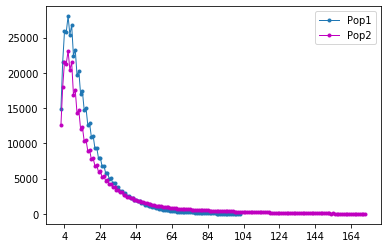

In [3]:
## Use preview file as the infile

plotPreview(infile="Preview_MinSamp4.txt")

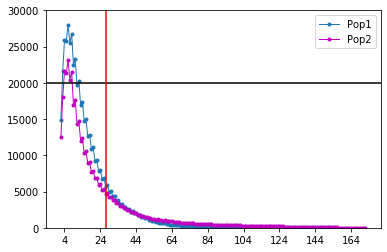

In [19]:
## Zoom in using the zoom=True and y-axis limit
## Can also add horizontal and vertical lines to pin-point optimal SegSites and samples

plotPreview("Preview_MinSamp4.txt", 
            zoom=True, yaxis=30000, 
            addHoriz=True, liney=20000,
            addVert=True, linex=25)

## We are not necessarily looking for where the lines overlap... 
## We may just be interested in using this plot to select the correct number of individuals from each pop so that 
##    the number of SNPs are equivalent.

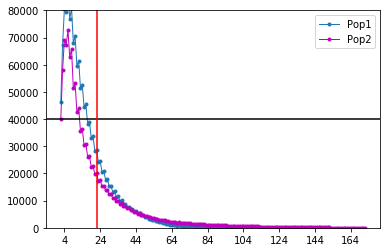

In [13]:
## Zoom in using the zoom=True and y-axis limit
## Can also add horizontal and vertical lines to pin-point optimal SegSites and samples

plotPreview("Preview_Linked_MinSamp4.txt", outpng="linkedSnpPreview",
            zoom=True, yaxis=80000, 
            addHoriz=True, liney=40000,
            addVert=True, linex=20)

## We are not necessarily looking for where the lines overlap... 
## We may just be interested in using this plot to select the correct number of individuals from each pop so that 
##    the number of SNPs are equivalent.